# Thermal Modeling of a Spring-Piston-Cylinder System with Prescribed Volume Dynamics

**Author:** Peter Facina  
**Course / Project:** Thermal Systems Modeling  
**Date:** December 2, 2025

## 1. Introduction

Spring-piston-cylinder systems are commonly used in compressors, engines, and mechanical actuators,
where piston motion directly influences the thermodynamic state of a confined gas.
Understanding the coupled mechanical and thermal behavior of such systems is essential for
predicting temperature and pressure variations during operation.

The objective of this project is to numerically model the temperature response of an ideal gas
contained within a spring-loaded piston-cylinder assembly undergoing periodic compression
and expansion. The model focuses on the relationship between prescribed piston motion,
gas volume variation, and resulting thermodynamic behavior.

## 2. Physical System Description

The system consists of a rigid cylinder containing an ideal gas, sealed by a frictionless piston.
The piston is attached to a linear spring that provides a restoring force during compression and
expansion. As the piston moves, the gas volume varies, resulting in corresponding changes in the
thermodynamic state of the gas.

In this model, the piston motion is prescribed as a periodic oscillation, representing repeated
compression and expansion of the gas. The focus of the analysis is on the thermodynamic response
of the gas to the imposed volume variation.

### Assumptions
- The gas behaves as an ideal gas
- Gas properties are spatially uniform (lumped-parameter model)
- The piston is frictionless
- The spring behaves linearly (Hooke’s law)
- Piston motion is prescribed and not solved from force balance
- No mass enters or leaves the cylinder
- Kinetic and potential energy effects are negligible
- Heat transfer with the surroundings is neglected (adiabatic process)
- The specific heat at constant volume, $C_v$, is assumed constant over the operating temperature range

## 3. Governing Equations

The system is modeled as a closed thermodynamic system undergoing compression and expansion.
Applying the first law of thermodynamics to the gas:


$\frac{dU}{dt} = \dot{Q} - \dot{W}$


Under the assumption of an adiabatic process, $\dot{Q} = 0$, and the rate of work done by the gas is


$\dot{W} = P \frac{dV}{dt}$


For an ideal gas, the internal energy is given by


$U = m C_v T$


Differentiating with respect to time yields


$m C_v \frac{dT}{dt} = - P \frac{dV}{dt}$


Using the ideal gas law, $P = \frac{m R T}{V}$, the governing differential equation becomes


$\frac{dT}{dt} = - \frac{R T}{C_v V(t)} \frac{dV}{dt}$


## 4. Prescribed Volume Variation

The piston motion is prescribed as a periodic oscillation, resulting in a time-varying gas volume.
The volume is modeled using a sinusoidal function of time:

$$
V(t) = V_{\min} + \frac{V_{\max} - V_{\min}}{2}
\left( 1 + \cos(\omega t) \right)
$$

where:
- $V_{\min}$ is the minimum gas volume  
- $V_{\max}$ is the maximum gas volume  
- $\omega = 2\pi f$ is the angular frequency  
- $f$ is the oscillation frequency

The time derivative of the volume, required for the governing equation, is

$$
\frac{dV}{dt}
= -\frac{V_{\max} - V_{\min}}{2} \, \omega \sin(\omega t)
$$

## 5. Model Parameters and Initial Conditions

The parameters used in the numerical model are listed below.

| Parameter | Value | Description |
|----------|------:|-------------|
| $T_0$ | 373 [K] | Initial gas temperature |
| $V_{\min}$ | 0.10 [m^3] | Minimum gas volume |
| $V_{\max}$ | 0.50 [m^3] | Maximum gas volume |
| $f$ | 2 [Hz] | Oscillation frequency |
| $R_{\text{air}}$ | 287 [J]/[kg][K] | Specific gas constant for air |
| $\gamma$ | 1.4 | Ratio of specific heats |
| $C_v$ | 718 [J]/[kg][K] | Specific heat at constant volume |
| $m$ | 2 [kg] | Mass of air |

The specific heat at constant volume is computed using the ideal-gas relation

$$
C_v = \frac{R_{\text{air}}}{\gamma - 1}
$$

The simulation is initialized at time $t = 0$ with a gas temperature of $T(0) = T_0$.

## 6. Numerical Method

The governing ordinary differential equation for the gas temperature is solved numerically
using a fourth-order Runge–Kutta (RK4) time integration scheme. The simulation time is
discretized into uniform time steps of size $\Delta t$, and the temperature is advanced
sequentially in time.

The RK4 method evaluates the temperature derivative at four intermediate stages within
each time step, providing improved accuracy compared to first-order methods such as
explicit Euler. For a general ordinary differential equation

$$
\frac{dT}{dt} = f(t, T)
$$

the RK4 update is given by

$$
\begin{aligned}
k_1 &= f(t_n, T_n) \\
k_2 &= f\!\left(t_n + \frac{\Delta t}{2}, T_n + \frac{k_1 \Delta t}{2}\right) \\
k_3 &= f\!\left(t_n + \frac{\Delta t}{2}, T_n + \frac{k_2 \Delta t}{2}\right) \\
k_4 &= f(t_n + \Delta t, T_n + k_3 \Delta t)
\end{aligned}
$$

$$
T_{n+1} = T_n + \frac{\Delta t}{6}\left(k_1 + 2k_2 + 2k_3 + k_4\right)
$$

A sufficiently small time step is selected to accurately capture the temperature oscillations
over each compression–expansion cycle.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Physical constants
R_air = (8.314 / 29) * 1e3 # J/(kg * K)
gamma = 1.4
Cv = R_air / (gamma - 1)

# Volume parameters
V_min = 0.1 # m^3
V_max = 0.5 # m^3
f = 2 # Hz
omega = 2 * np.pi * f

# Time parameters
t_list = np.linspace(0, 1.5, 4000)
dt = t_list[1] - t_list[0]

In [3]:
def V (t):
    return V_min + ((V_max - V_min) / 2) * (1 + np.cos(omega * t))

def dVdt (t):
    return -1 * ((V_max - V_min) / 2) * omega * np.sin(omega * t)

def dTdt (t, T):
    return -1 * ((R_air * T) / (Cv * V(t))) * (dVdt(t))

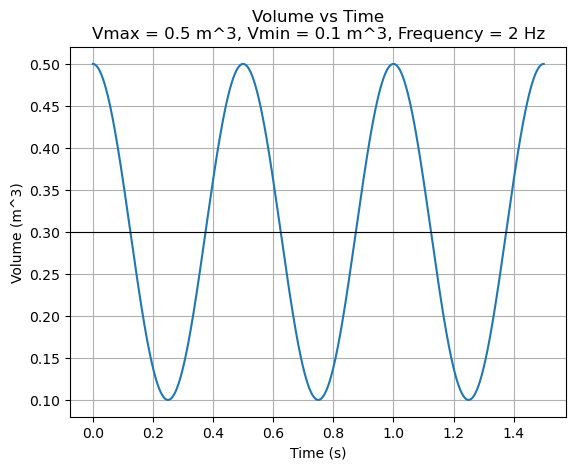

In [4]:
V_mean = 0.5 * (V_max + V_min)

# Plot volume response
plt.plot(t_list, V(t_list), color = "tab:blue")
plt.axhline(V_mean, color = "black", linewidth = 0.8)
plt.xlabel("Time (s)")
plt.ylabel("Volume (m^3)")
plt.title(
    "Volume vs Time\n"
    "Vmax = 0.5 m^3, Vmin = 0.1 m^3, Frequency = 2 Hz"
)
plt.grid(True)
plt.show()

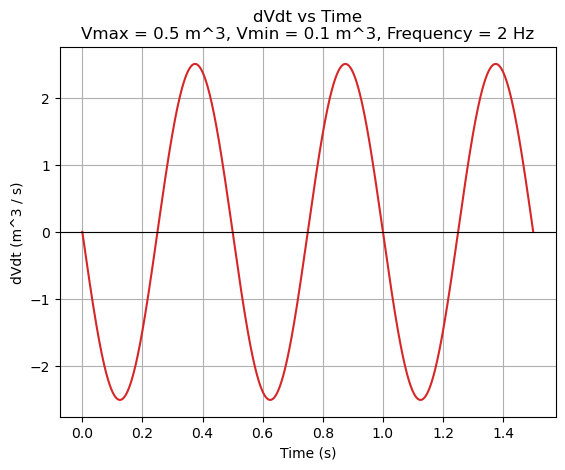

In [5]:
# Plot rate of change in volume response
plt.plot(t_list, dVdt(t_list), color = "tab:red")
plt.axhline(0, color = "black", linewidth = 0.8)
plt.xlabel("Time (s)")
plt.ylabel("dVdt (m^3 / s)")
plt.title(
    "dVdt vs Time\n"
    "Vmax = 0.5 m^3, Vmin = 0.1 m^3, Frequency = 2 Hz"
)
plt.grid(True)
plt.show()

Max Temperature: 710.0613415508279 K


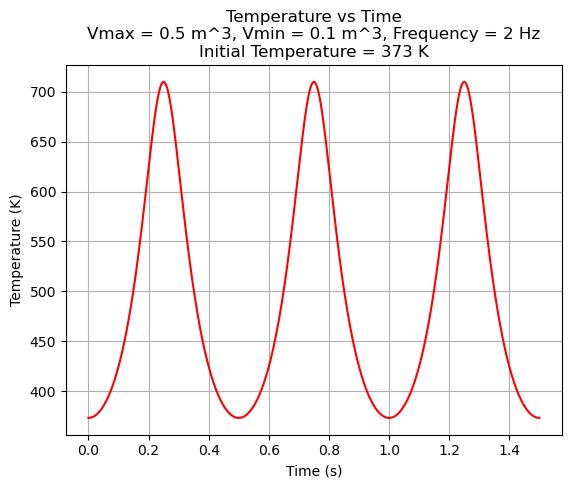

In [6]:
# Final simulation time
tf = 1.5

# Initial conditions
t0 = 0 # Initial time [s]
T0 = 373 # Initial temperature [K]

# Initialize solution storage lists
t_list = [t0] # Time history
T_list = [T0] # Temperature history
V_list = [V_max] # Volume history

# Initialize time variable
t = t0

# Time integration loop using RK4
while t < tf:
    
    # RK4 slope evaluations
    s1 = dTdt(t, T_list[-1])
    s2 = dTdt(t + (dt / 2), T_list[-1] + s1 * (dt / 2))
    s3 = dTdt(t + (dt / 2), T_list[-1] + s2 * (dt / 2))
    s4 = dTdt(t + dt, T_list[-1] + s3 * dt)

    # Advance solution to next time step
    t_new = t + dt
    T_new = T_list[-1] + (dt / 6) * (s1 + 2 * s2 + 2 * s3 + s4)

    # Store new values
    t_list.append(t_new)
    T_list.append(T_new)
    V_list.append(V(t_new))

    # Update time
    t = t_new

# Output maximum temperature reached during simulation
print("Max Temperature:", max(T_list), "K")

# Plot temperature response
plt.plot(t_list, T_list, "r")
plt.xlabel("Time (s)")
plt.ylabel("Temperature (K)")
plt.title(
    "Temperature vs Time\n"
    "Vmax = 0.5 m^3, Vmin = 0.1 m^3, Frequency = 2 Hz\n"
    "Initial Temperature = 373 K"
)
plt.grid(True)
plt.show()

Max Pressure: 4071322.2093482898 Pa


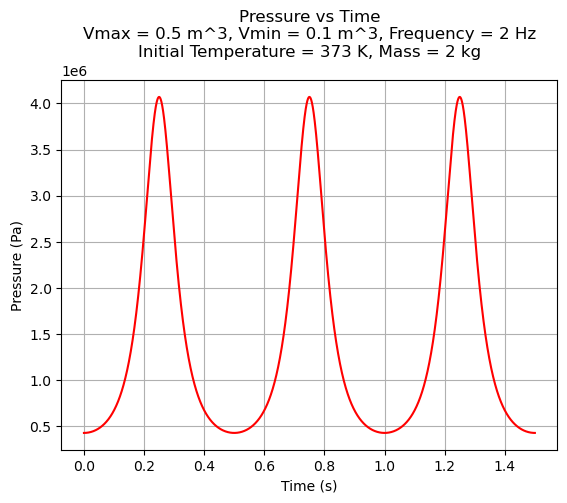

In [7]:
# Gas mass [kg]
m = 2


# Pressure history storage
P_list = []


for i in range (len(T_list)):
    # Ideal gas law: P = (mRT) / V
    P_list.append(((m * R_air * T_list[i]) / V_list[i]))

# Output maximum pressure reached during simulation
print("Max Pressure:", max(P_list), "Pa")

# Plot pressure response
plt.plot(t_list, P_list, "r")
plt.xlabel("Time (s)")
plt.ylabel("Pressure (Pa)")
plt.title(
    "Pressure vs Time\n"
    "Vmax = 0.5 m^3, Vmin = 0.1 m^3, Frequency = 2 Hz\n"
    "Initial Temperature = 373 K, Mass = 2 kg"
)
plt.grid(True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

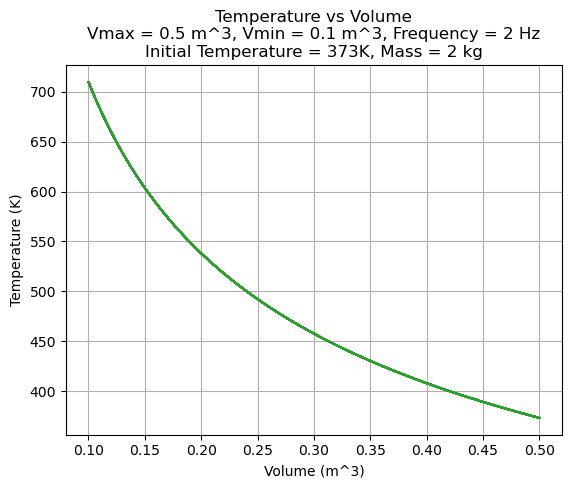

In [8]:
# Plot temperature-volume relationship over one compression-expansion cycle
plt.plot(V_list, T_list, color = "tab:green")
plt.xlabel("Volume (m^3)")
plt.ylabel("Temperature (K)")
plt.title(
    "Temperature vs Volume\n"
    "Vmax = 0.5 m^3, Vmin = 0.1 m^3, Frequency = 2 Hz\n"
    "Initial Temperature = 373K, Mass = 2 kg"
)
plt.grid(True)
plt.show

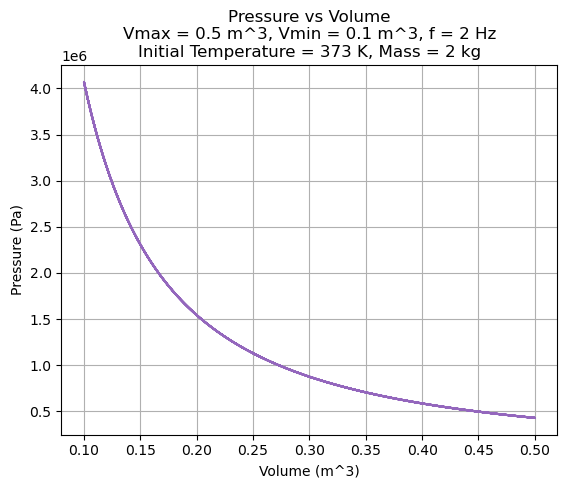

In [9]:
# Plot temperature-volume relationship over one compression-expansion cycle
plt.plot(V_list, P_list, color = "tab:purple")
plt.xlabel("Volume (m^3)")
plt.ylabel("Pressure (Pa)")
plt.title(
    "Pressure vs Volume\n"
    "Vmax = 0.5 m^3, Vmin = 0.1 m^3, f = 2 Hz\n"
    "Initial Temperature = 373 K, Mass = 2 kg"
)
plt.grid(True)
plt.show()

In [10]:
# Period of one compression-expansion cycle
T_cycle = 1 / f

# Store data for a single cycle
V_cycle = []
P_cycle = []
t_cycle = []

for i in range (len(t_list)):
    if t_list[i] <= T_cycle:
        t_cycle.append(t_list[i])
        V_cycle.append(V_list[i])
        P_cycle.append(P_list[i])

In [11]:
## Simpson's rule integration to compute work over one cycle
simp_int = 0

# Number of intervals and step sizes
n = len(t_cycle) - 1
h = t_cycle[1] - t_cycle[0]

# Ensure an even number of intervals for Simpson's rule
if n % 2 != 0:
    n -= 1

# Integrand: P(t) * dV/dt
def f(i):
    return P_cycle[i] * dVdt(t_cycle[i])

# Endpoints contribution
simp_int += f(0)
simp_int += f(n)

# Interior points contribution
for i in range(1, n):
    if i % 2 == 0:
        simp_int += 2 * f(i)
    else:
        simp_int += 4 * f(i)

# Final work over one cycle
W_cycle = (h / 3) * simp_int

print("Work per cycle (J):", W_cycle)

Work per cycle (J): -0.9503439856034189


In [12]:
# List to store parametric study results
Tmax_list = []
compression_ratio_list = []

## Initial maximum volume for sweep
V_max_initial = 0.1
V_max = V_max_initial

# Sweep over maximum volume values
while V_max <= 2:
    
    # Reset solution for current V_max
    t_list = [t0]
    T_list = [T0]
    t = t0
    
    ## RK4 time integration
    while t < tf:
        s1 = dTdt(t, T_list[-1])
        s2 = dTdt(t + (dt / 2), T_list[-1] + s1 * (dt / 2))
        s3 = dTdt(t + (dt / 2), T_list[-1] + s2 * (dt / 2))
        s4 = dTdt(t + dt, T_list[-1] + s3 * dt)
    
        t_new = t + dt
        T_new = T_list[-1] + (dt / 6) * (s1 + 2 * s2 + 2 * s3 + s4)
    
        t_list.append(t_new)
        T_list.append(T_new)

        t = t_new

    # Compute compression ratio and store peak ratio
    compression_ratio = V_max / V_min
    
    # Store peak temperature for current compression ratio
    compression_ratio_list.append(compression_ratio)
    Tmax_list.append(max(T_list))

    # Increment max volume
    V_max += 0.01

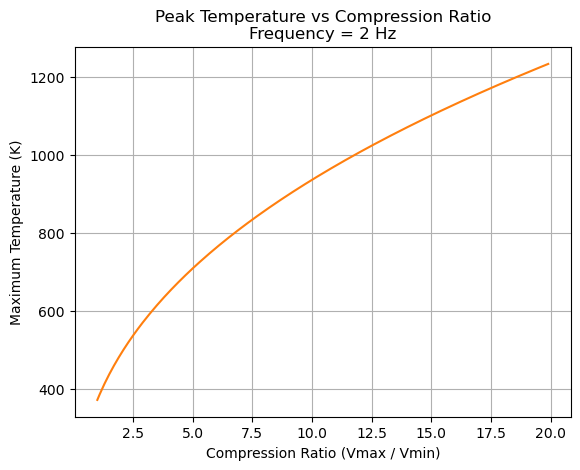

In [13]:
# Plot peak temperature as a function of compression ratio
plt.plot(compression_ratio_list, Tmax_list, color = "tab:orange")
plt.xlabel("Compression Ratio (Vmax / Vmin)")
plt.ylabel("Maximum Temperature (K)")
plt.title(
    "Peak Temperature vs Compression Ratio\n"
    "Frequency = 2 Hz"    
)
plt.grid(True)
plt.show()

In [14]:
# Lists to store frequency sweep results
Tmax_list = []
frequency_list = []

# Fixed maximum volume for frequency study
V_max = 0.5

# Number of time steps per oscillation cycles
steps_per_cycle = 1000

# Total simulation time
tf = 5

# Initial conditions
t0 = 0
T0 = 373

# Initial frequency
f0 = 0.5
f = f0

# Sweep over oscillation frequency
while f < 50:
    
    # Reset solution for current frequency
    t_list = [t0]
    T_list = [T0]
   
    t = t0
    omega = 2 * np.pi * f

    # Time step chosen to maintain fixed resolution per cycle
    dt = 1 / (f * steps_per_cycle)

    # Rk4 time integration
    while t < tf:
        s1 = dTdt(t, T_list[-1])
        s2 = dTdt(t + (dt / 2), T_list[-1] + s1 * (dt / 2))
        s3 = dTdt(t + (dt / 2), T_list[-1] + s2 * (dt / 2))
        s4 = dTdt(t + dt, T_list[-1] + s3 * dt)
    
        t_new = t + dt
        T_new = T_list[-1] + (dt / 6) * (s1 + 2 * s2 + 2 * s3 + s4)
    
        t_list.append(t_new)
        T_list.append(T_new)

        t = t_new

    # Store peak temperature for current frequency
    frequency_list.append(f)
    Tmax_list.append(max(T_list))

    # Increment frequency
    f += 0.5

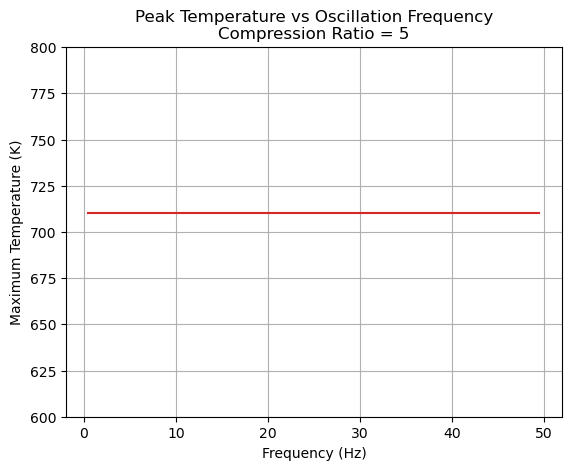

In [15]:
# Plot peak temperature as a function of frequency
plt.plot(frequency_list, Tmax_list, color = "tab:red")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Maximum Temperature (K)")
plt.title(
    "Peak Temperature vs Oscillation Frequency\n"
    "Compression Ratio = 5"
)
plt.grid(True)
plt.ylim(600, 800)
plt.show()

## 7. Results and Discussion

### 7.1 Prescribed Volume Motion

The prescribed sinusoidal volume function produces smooth and repeatable compression and expansion of the gas between the minimum and maximum volumes. The rate of change of volume, $dV/dt$, oscillates about zero, where positive values correspond to expansion and negative values correspond to compression. The zero crossings of $dV/dt$ line up with the maximum and minimum values of volume, confirming that the volume motion is behaving as intended.

This check is important because the thermodynamic response of the gas depends directly on the imposed volume variation.

### 7.2 Temperature Response

The gas temperature changes periodically as the volume oscillates. Temperature increases during compression and decreases during expansion, which is expected for an adiabatic process where work is done on and by the gas. Maximum temperatures occur near minimum volume, while minimum temperatures occur near maximum volume.

This phase relationship matches basic thermodynamic intuition and indicates that the energy balance and numerical integration are capturing the correct physical behavior.

### 7.3 Pressure Behavior and P-V Relationship

Pressure calculated using the ideal gas law follows trends similar to temperature. Pressure is highest when the volume is smallest and lowest when the volume is largest. The pressure-volume diagram over one full cycle forms a closed loop, showing that the system undergoes a repeating compression-expansion process.

For this idealized, adiabatic system, the net work over a full cycle is approximately zero. Any small nonzero work values are attributed to numerical integration error rather than physical losses.

### 7.4 Effect of Compression Ratio on Peak Temperature

The compression ratio study shows that increasing the ratio of maximum to minimum volume leads to higher peak temperatures. Larger compression ratios require more work to compress the gas, which results in greater temperature rise.

This trend is consistent with fundamental thermodynamic principles and demonstrates that peak temperature is strongly influenced by the severity of compression.

### 7.5 Effect of Oscillation Frequency on Peak Temperature

A frequency sweep was performed to examine whether oscillation frequency affects the maximum gas temperature during a compression–expansion cycle. The results show that the peak temperature remains essentially constant across the range of frequencies considered.

This indicates that, under the assumptions of an adiabatic process with prescribed volume motion, the maximum temperature is determined primarily by the compression ratio rather than the speed of oscillation. Since no heat transfer or dissipative effects are included in the model, changing the oscillation frequency does not alter the peak thermodynamic state reached
during compression.

These results suggest that, for the idealized system considered, frequency affects the timing of the process but not the maximum temperature attained.

### 7.6 Model Limitations

The present model includes several simplifying assumptions. The piston motion is prescribed rather than determined from a force balance, and heat transfer with the surroundings is ignored. Gas properties are assumed constant, and frictional effects are neglected. While these assumptions are appropriate for a first-order model, they limit the accuracy of predictions for real piston-cylinder systems.

Future work could include coupling the piston motion to a mechanical model, adding heat transfer, or allowing gas properties to vary with temperature.

## 8. Conclusion

A numerical model of a spring-piston-cylinder system undergoing periodic compression and
expansion was developed using an adiabatic energy balance and integrated using a fourth-order
Runge-Kutta method. The model captures the expected phase relationships between volume,
temperature, and pressure for an ideal gas.

Parametric studies showed that the maximum gas temperature increases with compression ratio,
while oscillation frequency does not significantly affect peak temperature under the assumptions
of prescribed volume motion and no heat transfer. These results highlight the dominant role of
compression severity in determining peak thermodynamic states for idealized systems.

While the model is simplified, it provides a clear framework for understanding coupled
mechanical-thermodynamic behavior and can be extended to include heat transfer, friction, or
dynamic piston motion for more realistic applications.